In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from myst_nb import glue
import numpy as np

import abtem
abtem.config.set({'local_diagnostics.progress_bar': False});

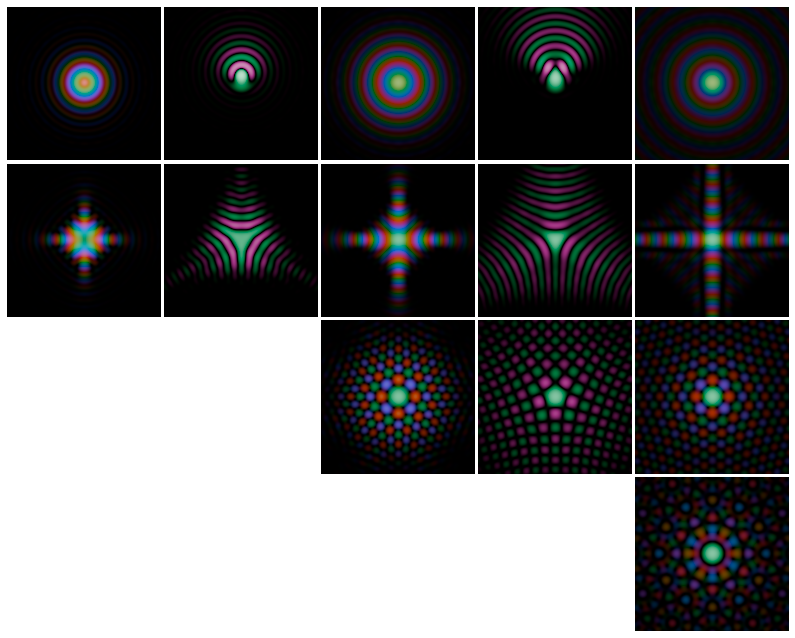

In [85]:
def make_aberrations_grid_plot(func, coefficient_scaling=60, **kwargs):
    nrows, ncols = (4, 5)

    fig = plt.figure(1, figsize=(14, 14))
    
    axes = ImageGrid(fig,
                     111,
                     nrows_ncols=(nrows, ncols),
                     **{'axes_pad': 0.05},
                     )
    
    magnitude = magnitude_start
    for n in range(5):

        i = 0
        for m in range(7):
            coefficient = f'C{n + 1}{m}'

            try:
                image = func({coefficient: magnitude})
            except ValueError:
                continue

            k = np.ravel_multi_index((i, n), (nrows, ncols))
            i += 1
            
            image.show(ax=axes[k], domain_coloring_kwargs=domain_coloring_kwargs, **kwargs)
            axes[k].axis('off')

        for j in range(i, 4):
            k = np.ravel_multi_index((j, n), (nrows, ncols))
            axes[k].set_axis_off()

        magnitude *= magnitude_scale
    plt.close()
    return fig


def probe_func(aberrations):
    probe = abtem.Probe(energy=100e3, semiangle_cutoff=30, gpts=(512, 512), extent=50, **aberrations)
    images = probe.build().complex_images().crop(extent=(15, 15), offset=(17.5, 17.5))
    return images * 3e4


def ctf_func(aberrations):
    ctf = abtem.CTF(energy=100e3, semiangle_cutoff=30, **aberrations)
    images = ctf.image(gpts=(128, 128), max_angle=30)
    return images * 1.8


#phase_real = make_ctf_coeff_grid_plot(lambda x: probe_func(x, 'angle'), 
#                                      cmap='hsv', 
#                                      imshow_kwargs={'interpolation':'none'})
#abs_real = make_ctf_coeff_grid_plot(lambda x: probe_func(x, 'abs'), 
#                                    cmap='viridis')

#make_ctf_coeff_grid_plot(ctf_func)

make_ctf_coeff_grid_plot(probe_func)

#glue("ctf_visualization_real", fig1, display=False)
#glue("ctf_visualization_fourier", fig2, display=False)


(<Figure size 432x288 with 2 Axes>,
 <Axes:xlabel='kx [1 / Å]', ylabel='ky [1 / Å]'>)

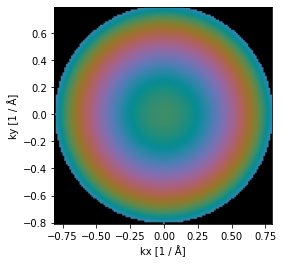

In [77]:
ctf_func({'defocus':100}).show()

In [6]:
from abtem.visualize.utils import domain_coloring
import cplot

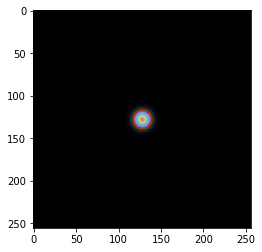

In [15]:
def probe_func():
    probe = abtem.Probe(energy=100e3, semiangle_cutoff=30, gpts=(256, 256), extent=50, C10=70)
    images = probe.build().complex_images()#.crop(extent=(10, 10), offset=(20, 20))
    return images #getattr(images, convert_complex)()

domain_coloring_kwargs = {'saturation_adjustment': 2,
                          'abs_scaling': lambda x: x ** 1.5 / (1 + x ** 1.5) 
                          }

arr = probe_func().array * 1e4

plt.imshow(cplot.get_srgb1(arr, **domain_coloring_kwargs))

In [12]:
np.minimum([1,1],[2,2,2])

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [9]:
30 / 180 * np.pi

0.5235987755982988

# Visualized aberrations

```{ctf_visualization_real}
```

`````{tab-set}

````{tab-item} conda

```{glue:} ctf_visualization_fourier
```

````
````{tab-item} pip

```{glue:} ctf_visualization_real
```

````
`````